# GAN Analysis

## imports

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari
import pickle as pkl
from keras.models import load_model

In [4]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [26]:
(x_train, y_train) = load_safari('camel')

## architecture

In [7]:
gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [5,5,5,5]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_conv_padding = 'same'
        , discriminator_batch_norm_momentum = None
        , discriminator_activation = 'relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_conv_padding = 'same'
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0004
        , optimiser = 'rmsprop'
        , z_dim = 100
        )

gan.save(RUN_FOLDER)

In [8]:
# gan.model = load_model(os.path.join(RUN_FOLDER, 'model.pkl'))
# gan.generator = load_model(os.path.join(RUN_FOLDER, 'generator.pkl'))
# gan.discriminator = load_model(os.path.join(RUN_FOLDER, 'discriminator.pkl'))

In [9]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 14, 14, 128)       204928    
__________

## training

In [11]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [16]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = 20000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

970 [D loss: (0.663)(R 0.674, F 0.652)] [D acc: (0.633)(0.562, 0.703)] [G loss: 1.036] [G acc: 0.031]
971 [D loss: (0.638)(R 0.664, F 0.613)] [D acc: (0.625)(0.547, 0.703)] [G loss: 1.019] [G acc: 0.156]
972 [D loss: (0.632)(R 0.642, F 0.621)] [D acc: (0.680)(0.562, 0.797)] [G loss: 1.061] [G acc: 0.078]
973 [D loss: (0.637)(R 0.695, F 0.578)] [D acc: (0.617)(0.500, 0.734)] [G loss: 1.001] [G acc: 0.156]
974 [D loss: (0.577)(R 0.589, F 0.564)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.012] [G acc: 0.188]
975 [D loss: (0.612)(R 0.560, F 0.663)] [D acc: (0.672)(0.641, 0.703)] [G loss: 0.994] [G acc: 0.156]
976 [D loss: (0.610)(R 0.632, F 0.589)] [D acc: (0.664)(0.531, 0.797)] [G loss: 1.001] [G acc: 0.156]
977 [D loss: (0.573)(R 0.570, F 0.577)] [D acc: (0.688)(0.625, 0.750)] [G loss: 0.985] [G acc: 0.156]
978 [D loss: (0.612)(R 0.530, F 0.694)] [D acc: (0.656)(0.688, 0.625)] [G loss: 1.096] [G acc: 0.125]
979 [D loss: (0.635)(R 0.637, F 0.633)] [D acc: (0.602)(0.547, 0.656)] [G loss: 0.

1050 [D loss: (0.512)(R 0.497, F 0.528)] [D acc: (0.789)(0.750, 0.828)] [G loss: 1.127] [G acc: 0.188]
1051 [D loss: (0.595)(R 0.550, F 0.640)] [D acc: (0.672)(0.609, 0.734)] [G loss: 1.143] [G acc: 0.094]
1052 [D loss: (0.570)(R 0.617, F 0.524)] [D acc: (0.695)(0.594, 0.797)] [G loss: 1.139] [G acc: 0.078]
1053 [D loss: (0.550)(R 0.467, F 0.633)] [D acc: (0.734)(0.750, 0.719)] [G loss: 1.124] [G acc: 0.109]
1054 [D loss: (0.584)(R 0.607, F 0.562)] [D acc: (0.648)(0.578, 0.719)] [G loss: 1.168] [G acc: 0.109]
1055 [D loss: (0.593)(R 0.580, F 0.605)] [D acc: (0.664)(0.641, 0.688)] [G loss: 1.148] [G acc: 0.188]
1056 [D loss: (0.509)(R 0.481, F 0.538)] [D acc: (0.758)(0.703, 0.812)] [G loss: 1.087] [G acc: 0.156]
1057 [D loss: (0.667)(R 0.607, F 0.727)] [D acc: (0.625)(0.625, 0.625)] [G loss: 1.047] [G acc: 0.188]
1058 [D loss: (0.618)(R 0.604, F 0.631)] [D acc: (0.617)(0.562, 0.672)] [G loss: 0.963] [G acc: 0.188]
1059 [D loss: (0.591)(R 0.500, F 0.683)] [D acc: (0.695)(0.734, 0.656)] [

1130 [D loss: (0.603)(R 0.596, F 0.609)] [D acc: (0.672)(0.594, 0.750)] [G loss: 1.119] [G acc: 0.078]
1131 [D loss: (0.648)(R 0.655, F 0.641)] [D acc: (0.664)(0.594, 0.734)] [G loss: 1.178] [G acc: 0.078]
1132 [D loss: (0.588)(R 0.634, F 0.541)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.141] [G acc: 0.094]
1133 [D loss: (0.593)(R 0.616, F 0.570)] [D acc: (0.695)(0.609, 0.781)] [G loss: 1.169] [G acc: 0.109]
1134 [D loss: (0.644)(R 0.473, F 0.816)] [D acc: (0.688)(0.766, 0.609)] [G loss: 1.170] [G acc: 0.109]
1135 [D loss: (0.639)(R 0.671, F 0.608)] [D acc: (0.586)(0.516, 0.656)] [G loss: 1.095] [G acc: 0.125]
1136 [D loss: (0.588)(R 0.609, F 0.568)] [D acc: (0.695)(0.609, 0.781)] [G loss: 0.986] [G acc: 0.141]
1137 [D loss: (0.601)(R 0.587, F 0.616)] [D acc: (0.703)(0.672, 0.734)] [G loss: 1.095] [G acc: 0.156]
1138 [D loss: (0.584)(R 0.527, F 0.641)] [D acc: (0.711)(0.734, 0.688)] [G loss: 0.989] [G acc: 0.266]
1139 [D loss: (0.568)(R 0.568, F 0.568)] [D acc: (0.711)(0.688, 0.734)] [

1210 [D loss: (0.579)(R 0.542, F 0.615)] [D acc: (0.688)(0.609, 0.766)] [G loss: 1.138] [G acc: 0.062]
1211 [D loss: (0.601)(R 0.578, F 0.624)] [D acc: (0.695)(0.656, 0.734)] [G loss: 1.148] [G acc: 0.109]
1212 [D loss: (0.646)(R 0.660, F 0.631)] [D acc: (0.625)(0.562, 0.688)] [G loss: 1.069] [G acc: 0.250]
1213 [D loss: (0.558)(R 0.536, F 0.581)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.205] [G acc: 0.156]
1214 [D loss: (0.584)(R 0.577, F 0.592)] [D acc: (0.727)(0.688, 0.766)] [G loss: 1.248] [G acc: 0.094]
1215 [D loss: (0.577)(R 0.634, F 0.520)] [D acc: (0.688)(0.625, 0.750)] [G loss: 1.225] [G acc: 0.094]
1216 [D loss: (0.626)(R 0.642, F 0.609)] [D acc: (0.648)(0.562, 0.734)] [G loss: 1.213] [G acc: 0.156]
1217 [D loss: (0.615)(R 0.624, F 0.605)] [D acc: (0.578)(0.516, 0.641)] [G loss: 1.163] [G acc: 0.125]
1218 [D loss: (0.506)(R 0.484, F 0.528)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.161] [G acc: 0.047]
1219 [D loss: (0.552)(R 0.489, F 0.615)] [D acc: (0.734)(0.734, 0.734)] [

1290 [D loss: (0.611)(R 0.614, F 0.609)] [D acc: (0.656)(0.594, 0.719)] [G loss: 1.161] [G acc: 0.109]
1291 [D loss: (0.543)(R 0.428, F 0.659)] [D acc: (0.789)(0.812, 0.766)] [G loss: 1.241] [G acc: 0.109]
1292 [D loss: (0.525)(R 0.560, F 0.489)] [D acc: (0.711)(0.641, 0.781)] [G loss: 1.185] [G acc: 0.094]
1293 [D loss: (0.572)(R 0.491, F 0.652)] [D acc: (0.680)(0.719, 0.641)] [G loss: 1.158] [G acc: 0.141]
1294 [D loss: (0.565)(R 0.537, F 0.592)] [D acc: (0.703)(0.688, 0.719)] [G loss: 1.210] [G acc: 0.031]
1295 [D loss: (0.531)(R 0.567, F 0.495)] [D acc: (0.695)(0.625, 0.766)] [G loss: 1.313] [G acc: 0.062]
1296 [D loss: (0.566)(R 0.597, F 0.536)] [D acc: (0.680)(0.594, 0.766)] [G loss: 1.230] [G acc: 0.078]
1297 [D loss: (0.540)(R 0.515, F 0.565)] [D acc: (0.766)(0.734, 0.797)] [G loss: 1.080] [G acc: 0.156]
1298 [D loss: (0.565)(R 0.510, F 0.620)] [D acc: (0.711)(0.672, 0.750)] [G loss: 1.127] [G acc: 0.125]
1299 [D loss: (0.586)(R 0.598, F 0.574)] [D acc: (0.688)(0.656, 0.719)] [

1370 [D loss: (0.517)(R 0.539, F 0.496)] [D acc: (0.766)(0.688, 0.844)] [G loss: 1.197] [G acc: 0.141]
1371 [D loss: (0.615)(R 0.617, F 0.612)] [D acc: (0.641)(0.609, 0.672)] [G loss: 1.184] [G acc: 0.078]
1372 [D loss: (0.596)(R 0.645, F 0.546)] [D acc: (0.672)(0.594, 0.750)] [G loss: 1.040] [G acc: 0.188]
1373 [D loss: (0.620)(R 0.632, F 0.608)] [D acc: (0.688)(0.578, 0.797)] [G loss: 1.096] [G acc: 0.172]
1374 [D loss: (0.601)(R 0.525, F 0.677)] [D acc: (0.680)(0.719, 0.641)] [G loss: 1.129] [G acc: 0.188]
1375 [D loss: (0.507)(R 0.504, F 0.510)] [D acc: (0.742)(0.703, 0.781)] [G loss: 1.340] [G acc: 0.125]
1376 [D loss: (0.535)(R 0.491, F 0.578)] [D acc: (0.711)(0.688, 0.734)] [G loss: 1.260] [G acc: 0.109]
1377 [D loss: (0.576)(R 0.505, F 0.648)] [D acc: (0.719)(0.672, 0.766)] [G loss: 1.241] [G acc: 0.141]
1378 [D loss: (0.524)(R 0.472, F 0.576)] [D acc: (0.711)(0.703, 0.719)] [G loss: 1.315] [G acc: 0.094]
1379 [D loss: (0.647)(R 0.618, F 0.676)] [D acc: (0.594)(0.594, 0.594)] [

1450 [D loss: (0.529)(R 0.590, F 0.468)] [D acc: (0.734)(0.609, 0.859)] [G loss: 1.352] [G acc: 0.047]
1451 [D loss: (0.569)(R 0.573, F 0.566)] [D acc: (0.688)(0.641, 0.734)] [G loss: 1.450] [G acc: 0.078]
1452 [D loss: (0.575)(R 0.620, F 0.531)] [D acc: (0.703)(0.609, 0.797)] [G loss: 1.373] [G acc: 0.078]
1453 [D loss: (0.596)(R 0.493, F 0.700)] [D acc: (0.703)(0.703, 0.703)] [G loss: 1.302] [G acc: 0.062]
1454 [D loss: (0.635)(R 0.752, F 0.517)] [D acc: (0.633)(0.484, 0.781)] [G loss: 1.218] [G acc: 0.031]
1455 [D loss: (0.532)(R 0.530, F 0.533)] [D acc: (0.750)(0.750, 0.750)] [G loss: 1.286] [G acc: 0.078]
1456 [D loss: (0.549)(R 0.596, F 0.502)] [D acc: (0.695)(0.562, 0.828)] [G loss: 1.236] [G acc: 0.156]
1457 [D loss: (0.525)(R 0.428, F 0.623)] [D acc: (0.750)(0.750, 0.750)] [G loss: 1.263] [G acc: 0.109]
1458 [D loss: (0.580)(R 0.580, F 0.581)] [D acc: (0.656)(0.562, 0.750)] [G loss: 1.248] [G acc: 0.094]
1459 [D loss: (0.555)(R 0.581, F 0.529)] [D acc: (0.734)(0.609, 0.859)] [

1530 [D loss: (0.508)(R 0.451, F 0.564)] [D acc: (0.711)(0.688, 0.734)] [G loss: 1.071] [G acc: 0.219]
1531 [D loss: (0.524)(R 0.514, F 0.535)] [D acc: (0.750)(0.703, 0.797)] [G loss: 1.190] [G acc: 0.156]
1532 [D loss: (0.565)(R 0.534, F 0.597)] [D acc: (0.695)(0.641, 0.750)] [G loss: 1.279] [G acc: 0.156]
1533 [D loss: (0.632)(R 0.596, F 0.668)] [D acc: (0.656)(0.609, 0.703)] [G loss: 1.146] [G acc: 0.109]
1534 [D loss: (0.585)(R 0.604, F 0.566)] [D acc: (0.680)(0.625, 0.734)] [G loss: 1.251] [G acc: 0.125]
1535 [D loss: (0.562)(R 0.608, F 0.516)] [D acc: (0.703)(0.594, 0.812)] [G loss: 1.315] [G acc: 0.062]
1536 [D loss: (0.506)(R 0.543, F 0.470)] [D acc: (0.734)(0.625, 0.844)] [G loss: 1.212] [G acc: 0.094]
1537 [D loss: (0.598)(R 0.560, F 0.635)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.270] [G acc: 0.094]
1538 [D loss: (0.586)(R 0.653, F 0.519)] [D acc: (0.703)(0.578, 0.828)] [G loss: 1.199] [G acc: 0.047]
1539 [D loss: (0.484)(R 0.457, F 0.511)] [D acc: (0.734)(0.734, 0.734)] [

1610 [D loss: (0.574)(R 0.607, F 0.541)] [D acc: (0.672)(0.609, 0.734)] [G loss: 1.120] [G acc: 0.250]
1611 [D loss: (0.499)(R 0.519, F 0.480)] [D acc: (0.766)(0.703, 0.828)] [G loss: 1.228] [G acc: 0.156]
1612 [D loss: (0.540)(R 0.538, F 0.542)] [D acc: (0.734)(0.656, 0.812)] [G loss: 1.170] [G acc: 0.172]
1613 [D loss: (0.643)(R 0.627, F 0.659)] [D acc: (0.648)(0.625, 0.672)] [G loss: 1.205] [G acc: 0.141]
1614 [D loss: (0.579)(R 0.571, F 0.587)] [D acc: (0.703)(0.641, 0.766)] [G loss: 1.214] [G acc: 0.109]
1615 [D loss: (0.571)(R 0.592, F 0.549)] [D acc: (0.688)(0.594, 0.781)] [G loss: 1.153] [G acc: 0.156]
1616 [D loss: (0.669)(R 0.589, F 0.750)] [D acc: (0.648)(0.625, 0.672)] [G loss: 1.286] [G acc: 0.109]
1617 [D loss: (0.546)(R 0.615, F 0.476)] [D acc: (0.680)(0.547, 0.812)] [G loss: 1.198] [G acc: 0.094]
1618 [D loss: (0.499)(R 0.489, F 0.509)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.226] [G acc: 0.141]
1619 [D loss: (0.588)(R 0.580, F 0.596)] [D acc: (0.664)(0.594, 0.734)] [

1690 [D loss: (0.622)(R 0.774, F 0.469)] [D acc: (0.672)(0.453, 0.891)] [G loss: 1.475] [G acc: 0.125]
1691 [D loss: (0.534)(R 0.464, F 0.603)] [D acc: (0.766)(0.750, 0.781)] [G loss: 1.261] [G acc: 0.109]
1692 [D loss: (0.546)(R 0.551, F 0.541)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.283] [G acc: 0.062]
1693 [D loss: (0.514)(R 0.534, F 0.495)] [D acc: (0.758)(0.656, 0.859)] [G loss: 1.222] [G acc: 0.125]
1694 [D loss: (0.559)(R 0.530, F 0.588)] [D acc: (0.727)(0.719, 0.734)] [G loss: 1.207] [G acc: 0.062]
1695 [D loss: (0.600)(R 0.558, F 0.642)] [D acc: (0.664)(0.594, 0.734)] [G loss: 1.234] [G acc: 0.109]
1696 [D loss: (0.546)(R 0.596, F 0.495)] [D acc: (0.727)(0.609, 0.844)] [G loss: 1.195] [G acc: 0.141]
1697 [D loss: (0.558)(R 0.622, F 0.495)] [D acc: (0.711)(0.578, 0.844)] [G loss: 1.112] [G acc: 0.172]
1698 [D loss: (0.558)(R 0.507, F 0.610)] [D acc: (0.695)(0.719, 0.672)] [G loss: 1.256] [G acc: 0.156]
1699 [D loss: (0.584)(R 0.635, F 0.533)] [D acc: (0.695)(0.609, 0.781)] [

1770 [D loss: (0.590)(R 0.609, F 0.571)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.341] [G acc: 0.078]
1771 [D loss: (0.599)(R 0.600, F 0.599)] [D acc: (0.727)(0.641, 0.812)] [G loss: 1.282] [G acc: 0.047]
1772 [D loss: (0.602)(R 0.535, F 0.669)] [D acc: (0.656)(0.656, 0.656)] [G loss: 1.252] [G acc: 0.062]
1773 [D loss: (0.664)(R 0.718, F 0.610)] [D acc: (0.602)(0.469, 0.734)] [G loss: 1.255] [G acc: 0.094]
1774 [D loss: (0.552)(R 0.548, F 0.556)] [D acc: (0.711)(0.656, 0.766)] [G loss: 1.167] [G acc: 0.156]
1775 [D loss: (0.499)(R 0.504, F 0.495)] [D acc: (0.742)(0.688, 0.797)] [G loss: 1.221] [G acc: 0.156]
1776 [D loss: (0.607)(R 0.510, F 0.703)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.238] [G acc: 0.109]
1777 [D loss: (0.579)(R 0.625, F 0.532)] [D acc: (0.664)(0.562, 0.766)] [G loss: 1.212] [G acc: 0.141]
1778 [D loss: (0.633)(R 0.545, F 0.722)] [D acc: (0.727)(0.672, 0.781)] [G loss: 1.287] [G acc: 0.078]
1779 [D loss: (0.509)(R 0.521, F 0.497)] [D acc: (0.789)(0.703, 0.875)] [

1850 [D loss: (0.625)(R 0.680, F 0.571)] [D acc: (0.648)(0.531, 0.766)] [G loss: 1.239] [G acc: 0.141]
1851 [D loss: (0.542)(R 0.496, F 0.587)] [D acc: (0.750)(0.734, 0.766)] [G loss: 1.201] [G acc: 0.141]
1852 [D loss: (0.600)(R 0.542, F 0.658)] [D acc: (0.664)(0.656, 0.672)] [G loss: 1.202] [G acc: 0.172]
1853 [D loss: (0.536)(R 0.534, F 0.537)] [D acc: (0.773)(0.703, 0.844)] [G loss: 1.356] [G acc: 0.094]
1854 [D loss: (0.517)(R 0.521, F 0.512)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.383] [G acc: 0.078]
1855 [D loss: (0.538)(R 0.558, F 0.518)] [D acc: (0.766)(0.719, 0.812)] [G loss: 1.163] [G acc: 0.156]
1856 [D loss: (0.528)(R 0.492, F 0.564)] [D acc: (0.719)(0.719, 0.719)] [G loss: 1.320] [G acc: 0.156]
1857 [D loss: (0.568)(R 0.435, F 0.701)] [D acc: (0.672)(0.703, 0.641)] [G loss: 1.450] [G acc: 0.125]
1858 [D loss: (0.583)(R 0.673, F 0.492)] [D acc: (0.727)(0.625, 0.828)] [G loss: 1.271] [G acc: 0.172]
1859 [D loss: (0.460)(R 0.482, F 0.439)] [D acc: (0.789)(0.766, 0.812)] [

1930 [D loss: (0.591)(R 0.538, F 0.644)] [D acc: (0.680)(0.641, 0.719)] [G loss: 1.481] [G acc: 0.062]
1931 [D loss: (0.510)(R 0.531, F 0.489)] [D acc: (0.703)(0.625, 0.781)] [G loss: 1.402] [G acc: 0.078]
1932 [D loss: (0.556)(R 0.500, F 0.611)] [D acc: (0.664)(0.688, 0.641)] [G loss: 1.455] [G acc: 0.109]
1933 [D loss: (0.538)(R 0.572, F 0.504)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.313] [G acc: 0.109]
1934 [D loss: (0.608)(R 0.510, F 0.705)] [D acc: (0.680)(0.656, 0.703)] [G loss: 1.482] [G acc: 0.078]
1935 [D loss: (0.474)(R 0.513, F 0.435)] [D acc: (0.805)(0.719, 0.891)] [G loss: 1.348] [G acc: 0.094]
1936 [D loss: (0.572)(R 0.621, F 0.522)] [D acc: (0.734)(0.609, 0.859)] [G loss: 1.339] [G acc: 0.141]
1937 [D loss: (0.635)(R 0.631, F 0.639)] [D acc: (0.672)(0.641, 0.703)] [G loss: 1.274] [G acc: 0.141]
1938 [D loss: (0.552)(R 0.555, F 0.549)] [D acc: (0.688)(0.609, 0.766)] [G loss: 1.301] [G acc: 0.047]
1939 [D loss: (0.597)(R 0.634, F 0.560)] [D acc: (0.664)(0.609, 0.719)] [

2010 [D loss: (0.523)(R 0.516, F 0.529)] [D acc: (0.703)(0.656, 0.750)] [G loss: 1.467] [G acc: 0.078]
2011 [D loss: (0.541)(R 0.596, F 0.487)] [D acc: (0.750)(0.656, 0.844)] [G loss: 1.393] [G acc: 0.125]
2012 [D loss: (0.611)(R 0.478, F 0.745)] [D acc: (0.742)(0.719, 0.766)] [G loss: 1.300] [G acc: 0.094]
2013 [D loss: (0.551)(R 0.541, F 0.561)] [D acc: (0.750)(0.688, 0.812)] [G loss: 1.271] [G acc: 0.109]
2014 [D loss: (0.506)(R 0.559, F 0.453)] [D acc: (0.734)(0.641, 0.828)] [G loss: 1.380] [G acc: 0.047]
2015 [D loss: (0.461)(R 0.447, F 0.476)] [D acc: (0.781)(0.750, 0.812)] [G loss: 1.334] [G acc: 0.109]
2016 [D loss: (0.503)(R 0.503, F 0.503)] [D acc: (0.742)(0.656, 0.828)] [G loss: 1.419] [G acc: 0.109]
2017 [D loss: (0.473)(R 0.504, F 0.442)] [D acc: (0.758)(0.672, 0.844)] [G loss: 1.481] [G acc: 0.109]
2018 [D loss: (0.467)(R 0.477, F 0.458)] [D acc: (0.797)(0.766, 0.828)] [G loss: 1.396] [G acc: 0.156]
2019 [D loss: (0.406)(R 0.430, F 0.381)] [D acc: (0.805)(0.703, 0.906)] [

KeyboardInterrupt: 

In [ ]:


check = True
while check :
    
    for _ in range(5):

        valid = np.ones((BATCH_SIZE,1))
        fake = np.zeros((BATCH_SIZE,1))

        idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
        true_imgs = x_train[idx]

        noise = np.random.normal(0, 1, (BATCH_SIZE, gan.z_dim))
        gen_imgs = gan.generator.predict(noise)

        d_loss_real, d_acc_real =   gan.discriminator.train_on_batch(true_imgs, valid)
        d_loss_fake, d_acc_fake =   gan.discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * (d_loss_real + d_loss_fake)
        d_acc = 0.5 * (d_acc_real + d_acc_fake)


    # Plot the progress
    print ("[D loss: (%.3f)(R %.3f, F %.3f)] [D acc: (%.3f)(%.3f, %.3f)]" % (d_loss, d_loss_real, d_loss_fake, d_acc, d_acc_real, d_acc_real))  
    

In [ ]:
check = True
while check:
    valid = np.ones((BATCH_SIZE,1), dtype=np.float32)
    noise = np.random.normal(0, 1, (BATCH_SIZE,100))

    idx = np.random.randint(0, x_train.shape[0], BATCH_SIZE)
    true_imgs = x_train[idx]
    
#     g_loss = gan.train_generator(batch_size = BATCH_SIZE)
    g_loss, g_acc = gan.model.train_on_batch(noise, valid)
    # Plot the progress
    print ("[G loss: %.3f] [G acc: %.3f]" % (g_loss, g_acc))
    
   

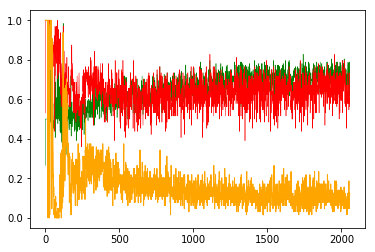

In [17]:


plt.plot([x[3] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[4] for x in gan.d_losses], color='red', linewidth=0.5)

plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=1)




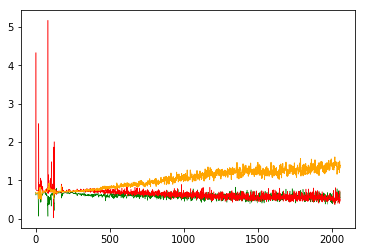

In [18]:


plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.5)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.5)

plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=1)



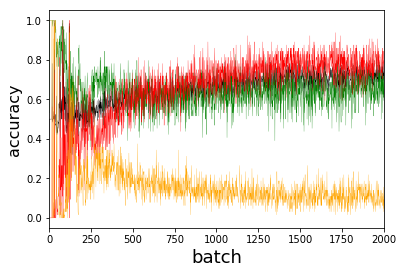

In [32]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()

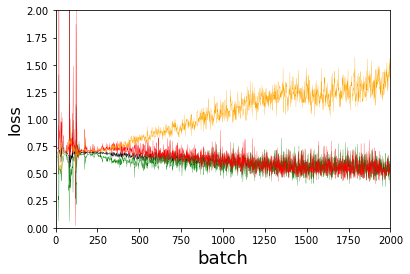

In [34]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()
